## sampling distribution


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set()

In [3]:
# https://www.kaggle.com/c/titanic/data
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
target_column = "age"

In [5]:
population = df[target_column].dropna()

### sample distribution


In [6]:
number_of_samples = 100
sample_size = 10
sample_means = []
sample_vars = []
sample_tvars = []

for i in range(number_of_samples):
    sample = population.sample(sample_size, random_state=i)
    sample_means.append(np.mean(sample))
    sample_vars.append(np.var(sample))
    sample_tvars.append(stats.tvar(sample))

#### mean


In [7]:
pd.DataFrame(
    {
        "sample_mean": [np.mean(sample_means)],
        "population_mean": [np.mean(population)],
    }
)

,sample_mean,population_mean
0,29.95177,29.699118


#### variance & unbiased variance


In [8]:
pd.DataFrame(
    {
        "sample_variance": [np.mean(sample_vars)],
        "sample_unbiased_variance": [np.mean(sample_tvars)],
        "population_variance": [np.var(population)],
    }
)

,sample_variance,sample_unbiased_variance,population_variance
0,185.894898,206.549886,210.72358


#### histogram & kde


Text(0.5, 1.0, 'Population')

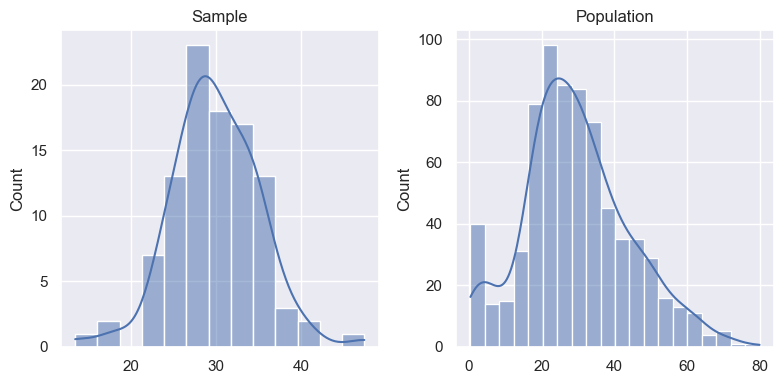

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, layout="tight", figsize=(8, 4))

sns.histplot(sample_means, kde=True, ax=axes[0])
sns.histplot(list(population), kde=True, ax=axes[1])

axes[0].set_title("Sample")
axes[1].set_title("Population")